# Pet Adoption Outcome Prediction and Data Analysis
Anoushka, Harini, Henry, Sirui, Zejia

In [1]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow as pa
import numpy as np


## Data Pre-Processing

In [2]:
df = pl.read_csv("aac_intakes_outcomes.csv")

print(df.shape)
df.head()


(79672, 41)


age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
str,str,str,str,str,str,i64,f64,str,str,i64,i64,str,str,i64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,i64,i64,f64,str,str,i64,i64,str,str,i64,f64,str,f64
"""10 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",3650,10.0,"""(7.5, 10.0]""","""2017-12-07 14:07:00""",12,2017,"""2017-12""","""Thursday""",0,1.0,2007,7,"""2017-12""","""10 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""Colony Creek And Hunters Trace…","""Normal""","""Stray""","""Neutered Male""",1,3650,10.0,"""(7.5, 10.0]""","""2017-12-07 00:00:00""",12,2017,"""2017-12""","""Thursday""",14,1.0,"""0 days 14:07:00.000000000""",0.588194
"""7 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",2555,7.0,"""(5.0, 7.5]""","""2014-12-20 16:35:00""",12,2014,"""2014-12""","""Saturday""",16,2.0,2007,7,"""2014-12""","""7 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research Blvd in Austin (…","""Normal""","""Public Assist""","""Neutered Male""",1,2555,7.0,"""(5.0, 7.5]""","""2014-12-19 10:21:00""",12,2014,"""2014-12""","""Friday""",10,2.0,"""1 days 06:14:00.000000000""",1.259722
"""6 years""","""A006100""","""2007-07-09 00:00:00""",null,"""Return to Owner""","""Neutered Male""",2190,6.0,"""(5.0, 7.5]""","""2014-03-08 17:10:00""",3,2014,"""2014-03""","""Saturday""",17,3.0,2007,7,"""2014-03""","""6 years""","""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research in Austin (TX)""","""Normal""","""Public Assist""","""Neutered Male""",1,2190,6.0,"""(5.0, 7.5]""","""2014-03-07 14:26:00""",3,2014,"""2014-03""","""Friday""",14,3.0,"""1 days 02:44:00.000000000""",1.113889
"""10 years""","""A047759""","""2004-04-02 00:00:00""","""Partner""","""Transfer""","""Neutered Male""",3650,10.0,"""(7.5, 10.0]""","""2014-04-07 15:12:00""",4,2014,"""2014-04""","""Monday""",15,1.0,2004,4,"""2014-04""","""10 years""","""A047759""","""Dog""","""Dachshund""","""Tricolor""","""Austin (TX)""","""Normal""","""Owner Surrender""","""Neutered Male""",1,3650,10.0,"""(7.5, 10.0]""","""2014-04-02 15:55:00""",4,2014,"""2014-04""","""Wednesday""",15,1.0,"""4 days 23:17:00.000000000""",4.970139
"""16 years""","""A134067""","""1997-10-16 00:00:00""",null,"""Return to Owner""","""Neutered Male""",5840,16.0,"""(15.0, 17.5]""","""2013-11-16 11:54:00""",11,2013,"""2013-11""","""Saturday""",11,1.0,1997,10,"""2013-11""","""16 years""","""A134067""","""Dog""","""Shetland Sheepdog""","""Brown/White""","""12034 Research Blvd in Austin …","""Injured""","""Public Assist""","""Neutered Male""",1,5840,16.0,"""(15.0, 17.5]""","""2013-11-16 09:02:00""",11,2013,"""2013-11""","""Saturday""",9,1.0,"""0 days 02:52:00.000000000""",0.119444


In [3]:
df.null_count()

age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,43324,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# drop rows with null outcomes and sex
df = df.drop_nulls(subset=["outcome_type", "sex_upon_intake"])

In [5]:
# dropping columns with redundant information, keeping days for all time columns
df = df.drop(
    [
        "age_upon_outcome",
        "age_upon_outcome_(days)",
        "age_upon_outcome_age_group",
        "outcome_month",
        "outcome_monthyear",
        "outcome_weekday",
        "outcome_hour",
        "dob_year",
        "dob_monthyear",
        "age_upon_intake",
        "age_upon_intake_(days)",
        "age_upon_intake_age_group",
        "intake_month",
        "intake_monthyear",
        "intake_weekday",
        "intake_hour",
        "time_in_shelter",
    ]
)

# convert date columns to datetime type
df = df.with_columns(
    pl.col("date_of_birth").str.to_datetime(),
    pl.col("outcome_datetime").str.to_datetime(),
    pl.col("intake_datetime").str.to_datetime(),
)

raw_df = df


In [6]:
df.head(30)

animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(years),outcome_datetime,outcome_year,outcome_number,dob_month,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(years),intake_datetime,intake_year,intake_number,time_in_shelter_days
str,datetime[μs],str,str,str,f64,datetime[μs],i64,f64,i64,str,str,str,str,str,str,str,str,i64,f64,datetime[μs],i64,f64,f64
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",10.0,2017-12-07 14:07:00,2017,1.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""Colony Creek And Hunters Trace…","""Normal""","""Stray""","""Neutered Male""",1,10.0,2017-12-07 00:00:00,2017,1.0,0.588194
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",7.0,2014-12-20 16:35:00,2014,2.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research Blvd in Austin (…","""Normal""","""Public Assist""","""Neutered Male""",1,7.0,2014-12-19 10:21:00,2014,2.0,1.259722
"""A006100""",2007-07-09 00:00:00,null,"""Return to Owner""","""Neutered Male""",6.0,2014-03-08 17:10:00,2014,3.0,7,"""A006100""","""Dog""","""Spinone Italiano Mix""","""Yellow/White""","""8700 Research in Austin (TX)""","""Normal""","""Public Assist""","""Neutered Male""",1,6.0,2014-03-07 14:26:00,2014,3.0,1.113889
"""A047759""",2004-04-02 00:00:00,"""Partner""","""Transfer""","""Neutered Male""",10.0,2014-04-07 15:12:00,2014,1.0,4,"""A047759""","""Dog""","""Dachshund""","""Tricolor""","""Austin (TX)""","""Normal""","""Owner Surrender""","""Neutered Male""",1,10.0,2014-04-02 15:55:00,2014,1.0,4.970139
"""A134067""",1997-10-16 00:00:00,null,"""Return to Owner""","""Neutered Male""",16.0,2013-11-16 11:54:00,2013,1.0,10,"""A134067""","""Dog""","""Shetland Sheepdog""","""Brown/White""","""12034 Research Blvd in Austin …","""Injured""","""Public Assist""","""Neutered Male""",1,16.0,2013-11-16 09:02:00,2013,1.0,0.119444
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""A233812""",2001-06-08 00:00:00,null,"""Return to Owner""","""Neutered Male""",13.0,2014-09-06 18:52:00,2014,1.0,6,"""A233812""","""Dog""","""Rottweiler/Chow Chow""","""Brown/Black""","""12317 Wycliff Ln in Austin (TX…","""Aged""","""Stray""","""Neutered Male""",1,13.0,2014-09-06 14:37:00,2014,1.0,0.177083
"""A234161""",2001-03-26 00:00:00,null,"""Return to Owner""","""Neutered Male""",12.0,2013-12-27 17:02:00,2013,1.0,3,"""A234161""","""Cat""","""Domestic Shorthair Mix""","""Black/White""","""1401 E Rundberg Ln in Austin (…","""Normal""","""Stray""","""Neutered Male""",1,12.0,2013-12-27 12:13:00,2013,1.0,0.200694
"""A236259""",2001-07-10 00:00:00,null,"""Return to Owner""","""Neutered Male""",13.0,2014-07-09 12:00:00,2014,1.0,7,"""A236259""","""Dog""","""Smooth Fox Terrier Mix""","""Black/Tricolor""","""Westgate & Cameron Loop in Aus…","""Normal""","""Stray""","""Neutered Male""",1,12.0,2014-07-05 07:13:00,2014,1.0,4.199306


In [7]:
df_short = df.head(50000)
df_short.write_csv("data.csv")

## EDA

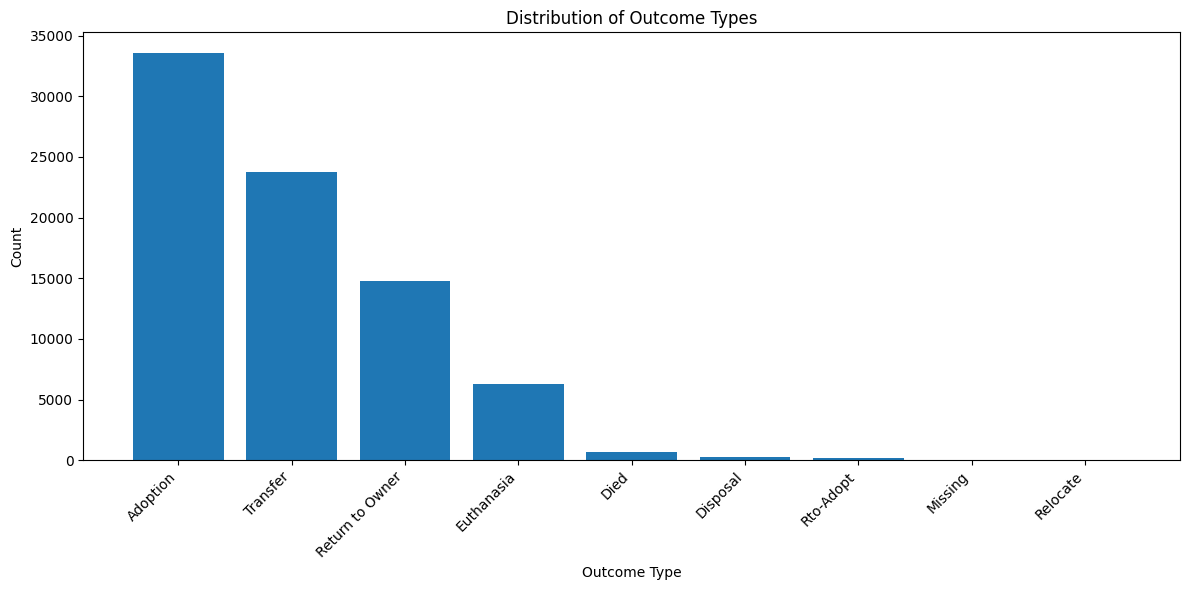

In [8]:
outcome_counts = df['outcome_type'].value_counts().sort('count', descending=True)

plt.figure(figsize=(12, 6))
plt.bar(outcome_counts['outcome_type'], outcome_counts['count'])
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Observation AS: Can analyse reasons for 'Return to Owner' and 'Euthanasia' more ## 
## (AS) I've added some logic to do that below

In [9]:
outcome_counts

outcome_type,count
str,u32
"""Adoption""",33594
"""Transfer""",23799
"""Return to Owner""",14790
"""Euthanasia""",6244
"""Died""",690
"""Disposal""",304
"""Rto-Adopt""",179
"""Missing""",46
"""Relocate""",15


In [10]:
# Analyse "Euthanasia" cases 

euth_analysis = df.filter(pl.col('outcome_type') == 'Euthanasia')\
                    .group_by('outcome_subtype')\
                    .agg([
                        pl.count('outcome_subtype').alias('count'),
                        pl.mean('time_in_shelter_days').alias('avg_time_in_shelter'),

                    ])\
                    .sort('count', descending=True)
euth_analysis

outcome_subtype,count,avg_time_in_shelter
str,u32,f64
"""Suffering""",2549,5.419864
"""Rabies Risk""",2539,0.913033
"""Aggressive""",497,13.117635
"""Medical""",265,8.015529
"""Behavior""",133,21.50353
"""At Vet""",36,40.427141
"""Underage""",28,0.12691
"""Court/Investigation""",23,155.025393
null,0,1.152598


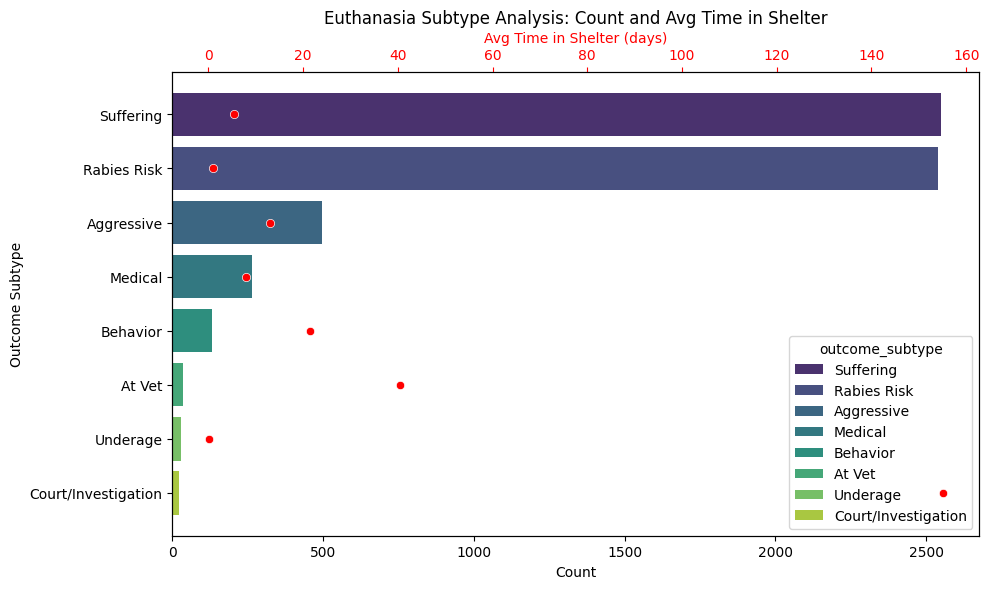

In [11]:
euth_analysis_df = euth_analysis.to_pandas()

# Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot counts as bars
sns.barplot(
    x='count', 
    y='outcome_subtype', 
    data=euth_analysis_df, 
    hue='outcome_subtype',
    palette='viridis', 
    ax=ax1
)
ax1.set_xlabel('Count')
ax1.set_ylabel('Outcome Subtype')
ax1.set_title('Euthanasia Subtype Analysis: Count and Avg Time in Shelter')

# Add a secondary axis for avg_time_in_shelter
ax2 = ax1.twiny()
sns.scatterplot(
    x='avg_time_in_shelter', 
    y='outcome_subtype', 
    data=euth_analysis_df, 
    color='red', 
    marker='o', 
    ax=ax2
)
ax2.set_xlabel('Avg Time in Shelter (days)', color='red')
ax2.tick_params(axis='x', colors='red')

# Display the plot
plt.tight_layout()
plt.show()

we can see that the two main reasons cause shelter to euthanatize are that animals are suffering and they have rabies risk that may cause panic in people. If they are suffering from illness or something more severe, euthanasia may be a way of relief to them. We can also see that when animals suffering, the time they stay in shelter is pretty short, which shows that the shelter performed euthanasia very soon. Is this a humanitarianism?

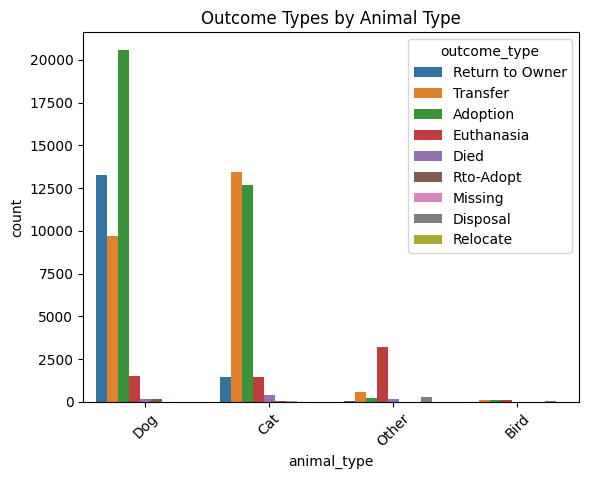

In [12]:
#Outcome Types by Animal Type

sns.countplot(data=df.to_pandas(), x='animal_type', hue='outcome_type')
plt.title('Outcome Types by Animal Type')
plt.xticks(rotation=45)
plt.show()


We can see from the plot that dog has a great instances of return to owners compared to other animal types, while it also has a higher proportion of adoption, which may mean dogs are still relatively easy to adopt, but the probability of returning them is also high, and the situation is more extreme. One thing need to be noticed is that Euthanasia of other types are extreamly high compared to dogs, cats, and birds, which may mean other animals are less common and accepted than cats and dogs.

Take a closer look at outcome distribution of dogs and cats, we can see their adoption rate are similar. The transfer rate and adoption rate of cats are quiet similar, which may mean cats are harder to integrate into new families due to their relatively high transfer rate.

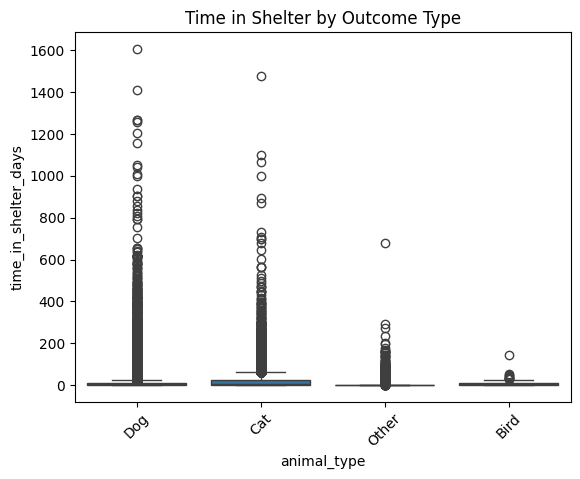

In [16]:
sns.boxplot(data=df.to_pandas(), x='animal_type', y='time_in_shelter_days')
plt.title('Time in Shelter by Outcome Type')
plt.xticks(rotation=45)
plt.show()

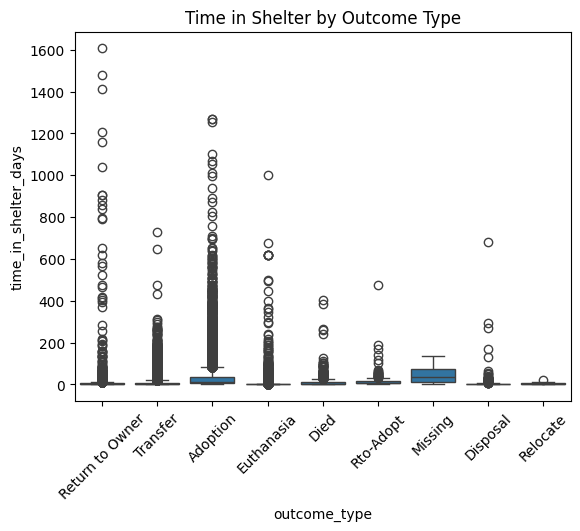

In [17]:
sns.boxplot(data=df.to_pandas(), x='outcome_type', y='time_in_shelter_days')
plt.title('Time in Shelter by Outcome Type')
plt.xticks(rotation=45)
plt.show()

we can see the days animals spent in shelter are pretty short, no matter their type and outcome type.

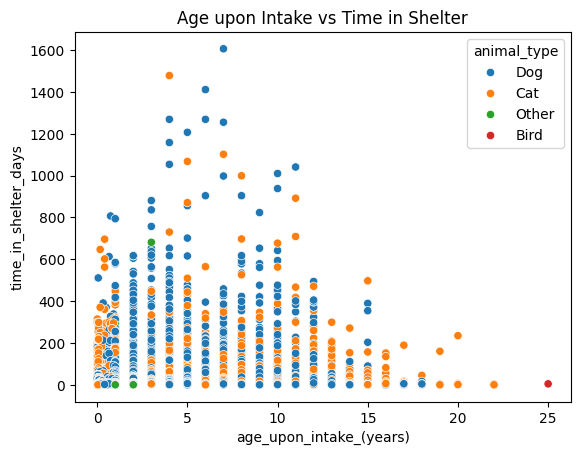

In [18]:
sns.scatterplot(data=df, x='age_upon_intake_(years)', y='time_in_shelter_days', hue='animal_type')
plt.title('Age upon Intake vs Time in Shelter')
plt.show()

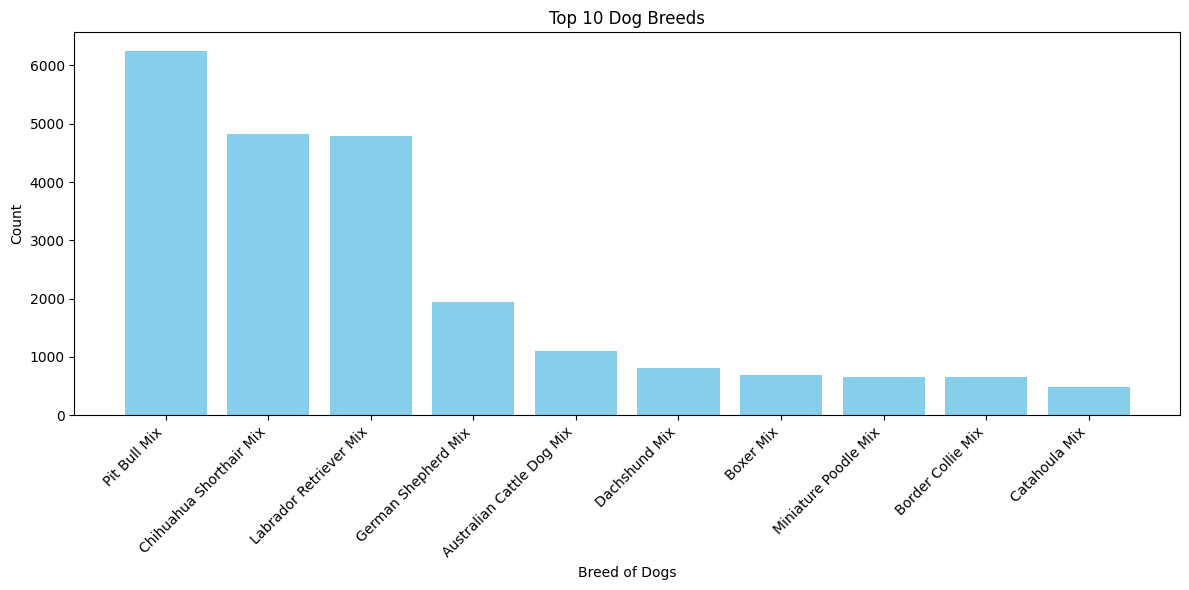

In [19]:
## Analysing trends for dog and cat adoption
#dogs top 10 breeds
#top dog breeds
top_breeds = (
    df.filter(pl.col('animal_type') == 'Dog')
    .group_by('breed')
    .agg(pl.count('breed').alias('count'))  # Use `agg` with `pl.count()`
    .sort('count', descending=True)
    .limit(10)
)

# Convert Polars DataFrame to Pandas for Matplotlib
top_breeds_pd = top_breeds.to_pandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_breeds_pd['breed'], top_breeds_pd['count'], color='skyblue')

plt.title('Top 10 Dog Breeds')
plt.xlabel('Breed of Dogs')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

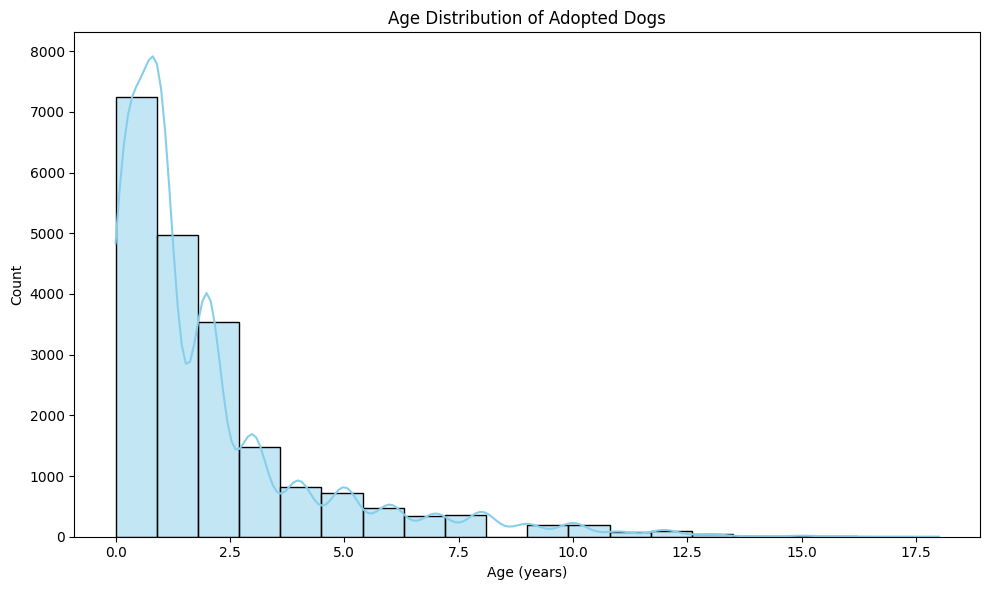

In [20]:
#adoption trends for dogs

# Filter for adopted dogs
dogs_adopted = df.filter(
    (pl.col('animal_type') == 'Dog') & 
    (pl.col('outcome_type') == 'Adoption')
)

# Age Analysis
plt.figure(figsize=(10, 6))
sns.histplot(dogs_adopted['age_upon_outcome_(years)'].to_numpy(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Adopted Dogs')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

From the plot we can tell as dogs get older, their chances of being adopted decrease.

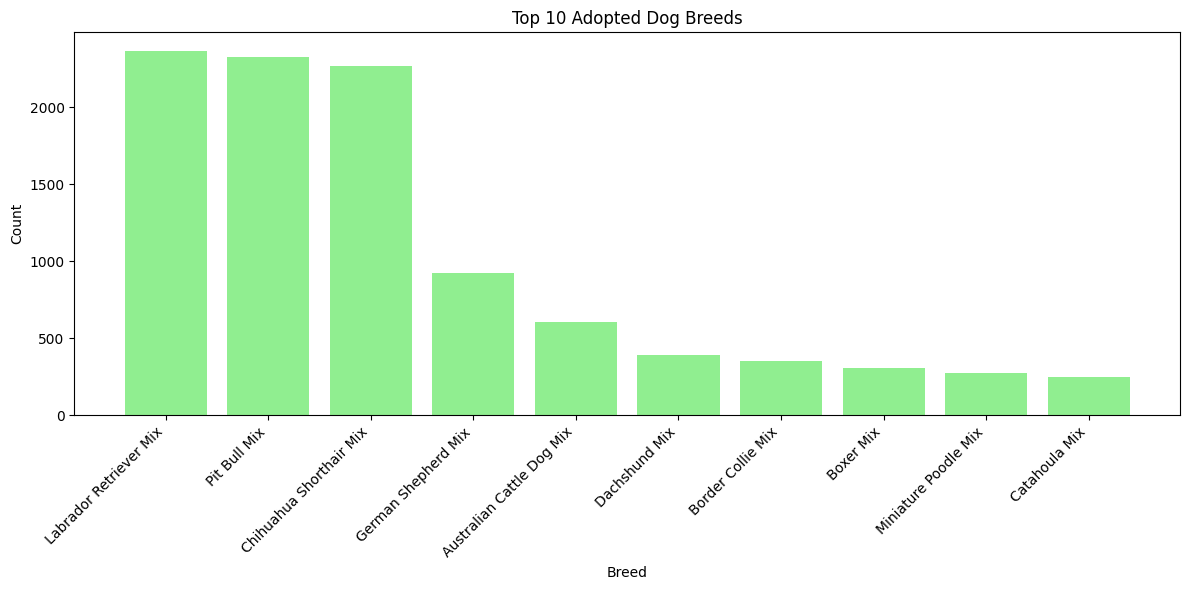

In [21]:
# Top Adopted Breeds
top_breeds = (
    dogs_adopted
    .group_by('breed')
    .agg(pl.len().alias('count'))  # Use `pl.len()` instead of `pl.count()`
    .sort('count', descending=True)
    .limit(10)
)

# Visualization for Top Breeds
plt.figure(figsize=(12, 6))
plt.bar(top_breeds['breed'].to_list(), top_breeds['count'].to_list(), color='lightgreen')
plt.title('Top 10 Adopted Dog Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

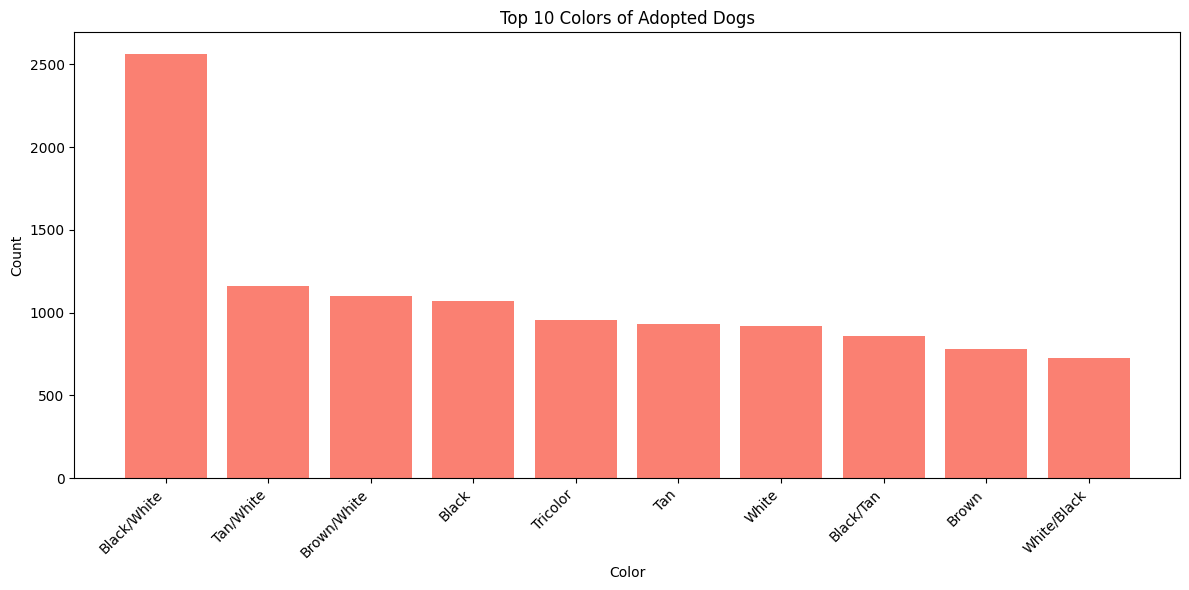

In [22]:
# Color Analysis
top_colors = (
    dogs_adopted
    .group_by('color')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
    .limit(10)
)

plt.figure(figsize=(12, 6))
plt.bar(top_colors['color'].to_list(), top_colors['count'].to_list(), color='salmon')
plt.title('Top 10 Colors of Adopted Dogs')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Black and white dogs seem to be more popular.

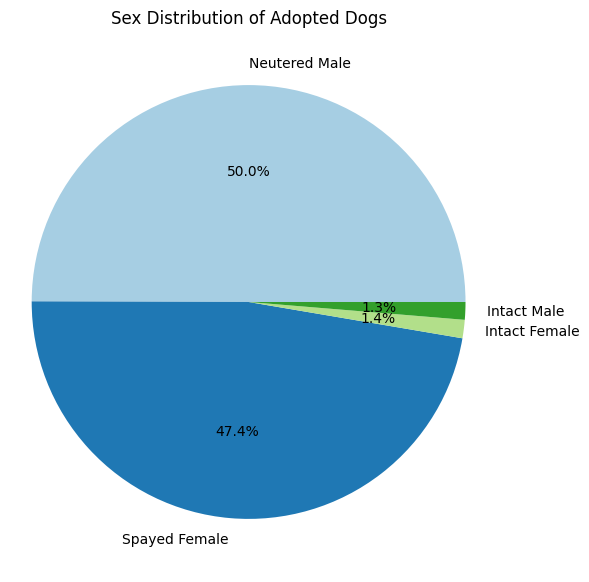

In [23]:
# Sex Analysis
sex_counts = (
    dogs_adopted
    .group_by('sex_upon_outcome')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)

plt.figure(figsize=(6, 6))
plt.pie(
    sex_counts['count'].to_list(), 
    labels=sex_counts['sex_upon_outcome'].to_list(), 
    autopct='%1.1f%%', 
    colors=plt.cm.Paired.colors
)
plt.title('Sex Distribution of Adopted Dogs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

we can see Male and female dogs are about the same rate of adoption, but the probability of spayed is 30 times higher than that of intact adoption.

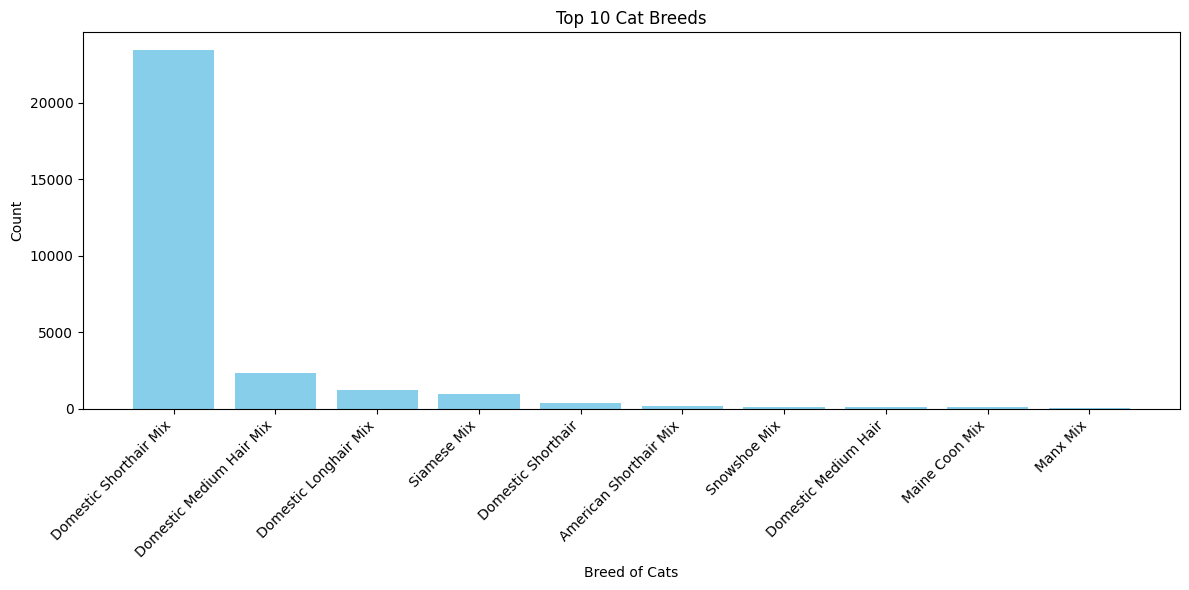

In [24]:

#top cat breeds

top_breeds = (
    df.filter(pl.col('animal_type') == 'Cat')
    .group_by('breed')
    .agg(pl.count('breed').alias('count'))  # Use `agg` with `pl.count()`
    .sort('count', descending=True)
    .limit(10)
)

# Convert Polars DataFrame to Pandas for Matplotlib
top_breeds_pd = top_breeds.to_pandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_breeds_pd['breed'], top_breeds_pd['count'], color='skyblue')

plt.title('Top 10 Cat Breeds')
plt.xlabel('Breed of Cats')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

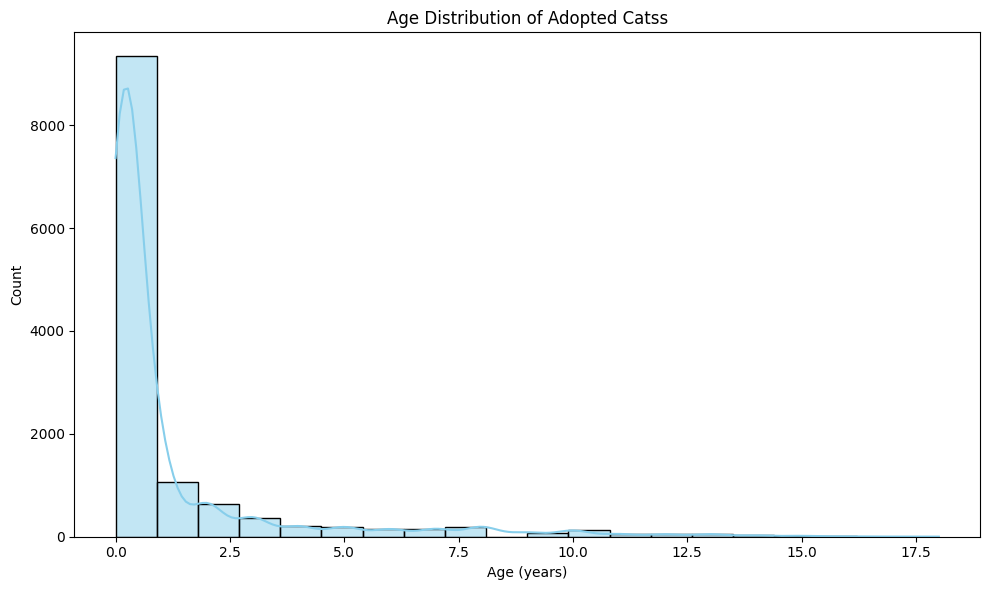

In [25]:
#adoption trends for cats

# Filter for adopted cats
cats_adopted = df.filter(
    (pl.col('animal_type') == 'Cat') & 
    (pl.col('outcome_type') == 'Adoption')
)

# Age Analysis
plt.figure(figsize=(10, 6))
sns.histplot(cats_adopted['age_upon_outcome_(years)'].to_numpy(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Adopted Catss')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Compared to dog's adoption trend, kittens aged 0-8 months are about 10 times more likely to be adopted than other age groups.

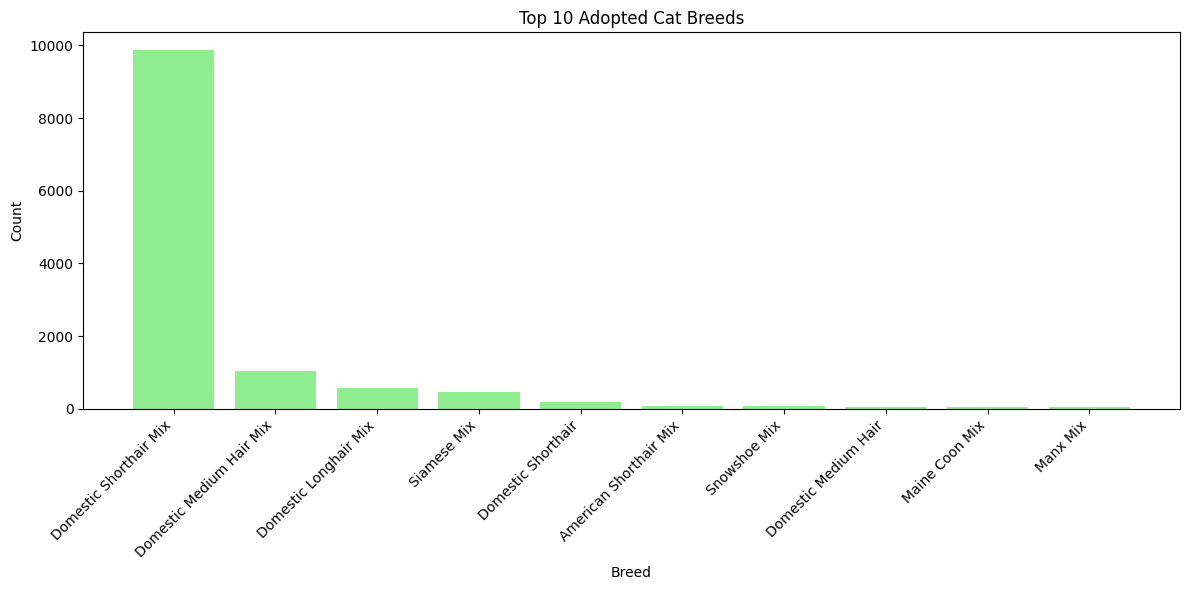

In [26]:
# Top Adopted Breeds
top_breeds = (
    cats_adopted
    .group_by('breed')
    .agg(pl.len().alias('count'))  # Use `pl.len()` instead of `pl.count()`
    .sort('count', descending=True)
    .limit(10)
)

# Visualization for Top Breeds
plt.figure(figsize=(12, 6))
plt.bar(top_breeds['breed'].to_list(), top_breeds['count'].to_list(), color='lightgreen')
plt.title('Top 10 Adopted Cat Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

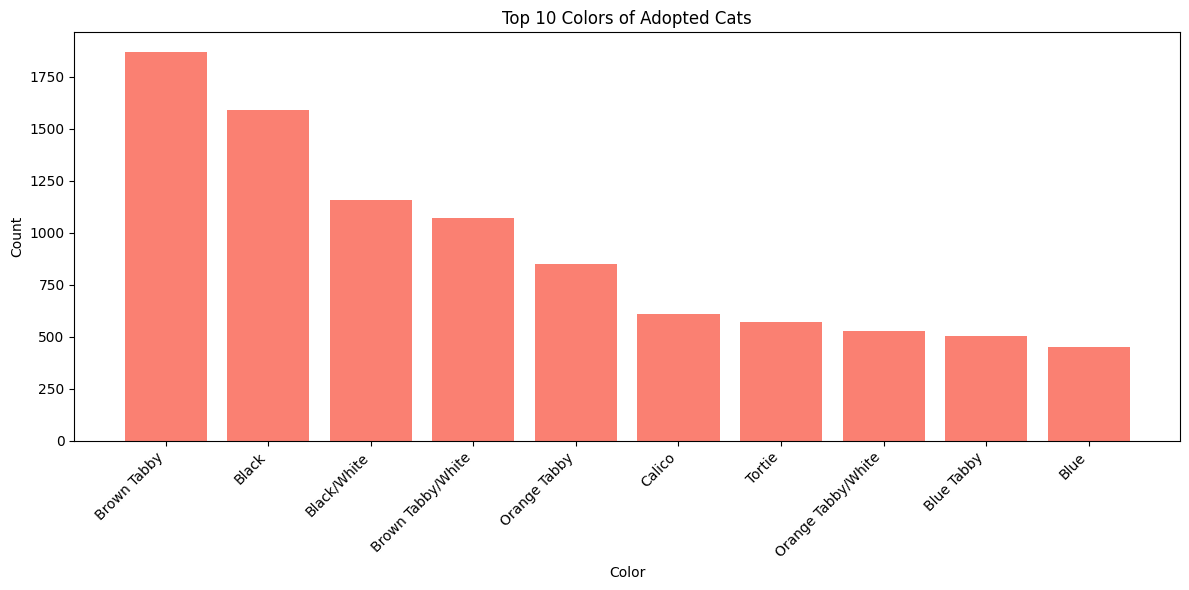

In [27]:
# Color Analysis
top_colors = (
    cats_adopted
    .group_by('color')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
    .limit(10)
)

plt.figure(figsize=(12, 6))
plt.bar(top_colors['color'].to_list(), top_colors['count'].to_list(), color='salmon')
plt.title('Top 10 Colors of Adopted Cats')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

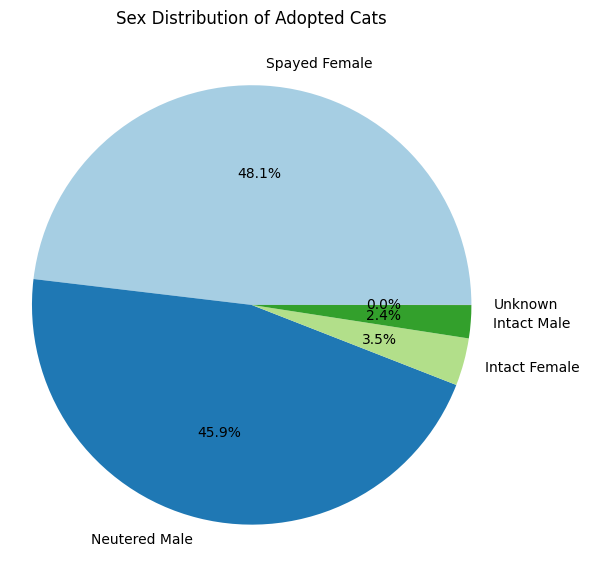

In [28]:
# Sex Analysis
sex_counts = (
    cats_adopted
    .group_by('sex_upon_outcome')
    .agg(pl.len().alias('count'))
    .sort('count', descending=True)
)

plt.figure(figsize=(6, 6))
plt.pie(
    sex_counts['count'].to_list(), 
    labels=sex_counts['sex_upon_outcome'].to_list(), 
    autopct='%1.1f%%', 
    colors=plt.cm.Paired.colors
)
plt.title('Sex Distribution of Adopted Cats')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

Cats' sex analysis seem to have the similar pattern with dogs'.

## Regression Analysis

The goal of this project is to determine the most influential features that influence adoption likelihood in order to provide valuable insights to shelters so that they can use this information to boost adoption rates of animals less likely to be adopted.

### Feature Analysis for Dogs
First we will look at features of dogs such as age, sex, and color to see if these impact adoption rates of dogs.

In [28]:
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind, chisquare, normaltest
import statsmodels as sm
from sklearn.preprocessing import OneHotEncoder

#### Age vs. Adoption

In [29]:
import pandas as pd
df = pd.read_csv("aac_intakes_outcomes.csv")
df.head(5)
df.shape

(79672, 41)

In [30]:
df.dropna(inplace=True)
df.shape

(36348, 41)

In [31]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['outcome_datetime'] = pd.to_datetime(df['outcome_datetime'])
df['intake_datetime'] = pd.to_datetime(df['intake_datetime'])

In [32]:
# Get values from dataframe for only dogs and use one-hot encoding for adoption
df_dogs = df[df['animal_type']=='Dog']
df_dogs['age_upon_intake_years'] = df_dogs["age_upon_intake_(years)"]
df_dogs.head()

/tmp/ipykernel_16253/3733472389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dogs['age_upon_intake_years'] = df_dogs["age_upon_intake_(years)"]


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_intake_years
3,10 years,A047759,2004-04-02,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10.0
12,16 years,A200922,1997-10-03,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,...,2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,16.0
13,14 years,A208755,2000-04-27,Suffering,Euthanasia,Neutered Male,5110,14.0,"(12.5, 15.0]",2015-02-17 16:25:00,...,2015-02-17 13:17:00,2,2015,2015-02,Tuesday,13,1.0,0 days 03:08:00.000000000,0.130556,14.0
14,17 years,A210457,1999-06-01,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,...,2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,17.0
18,15 years,A218622,1998-10-19,Suffering,Euthanasia,Neutered Male,5475,15.0,"(12.5, 15.0]",2013-12-02 17:09:00,...,2013-12-02 15:33:00,12,2013,2013-12,Monday,15,1.0,0 days 01:36:00.000000000,0.066667,15.0


In [33]:
def one_hot_adoption(adopted):
    if adopted == "Adoption":
        return 1
    else:
        return 0

In [34]:
df_dogs['encoded_adoption'] = df_dogs['outcome_type'].apply(one_hot_adoption)
df_dogs.head(5)

/tmp/ipykernel_16253/2406638437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dogs['encoded_adoption'] = df_dogs['outcome_type'].apply(one_hot_adoption)


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_intake_years,encoded_adoption
3,10 years,A047759,2004-04-02,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10.0,0
12,16 years,A200922,1997-10-03,Foster,Adoption,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,...,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,16.0,1
13,14 years,A208755,2000-04-27,Suffering,Euthanasia,Neutered Male,5110,14.0,"(12.5, 15.0]",2015-02-17 16:25:00,...,2,2015,2015-02,Tuesday,13,1.0,0 days 03:08:00.000000000,0.130556,14.0,0
14,17 years,A210457,1999-06-01,Foster,Adoption,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,...,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,17.0,1
18,15 years,A218622,1998-10-19,Suffering,Euthanasia,Neutered Male,5475,15.0,"(12.5, 15.0]",2013-12-02 17:09:00,...,12,2013,2013-12,Monday,15,1.0,0 days 01:36:00.000000000,0.066667,15.0,0


In [35]:
df_dogs.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days',
       'age_upon_intake_years', 'encoded_adoption'],
      dtype='object')

Using linear regression, we will see if the age of the dog upon intake is predictive of its adoption rate.

In [36]:
model_age = smf.ols(formula='encoded_adoption ~ age_upon_intake_years + 1', data=df_dogs)
results_age = model_age.fit()
print(results_age.summary())

                            OLS Regression Results                            
Dep. Variable:       encoded_adoption   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.70
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           4.40e-05
Time:                        01:08:00   Log-Likelihood:                -6246.4
No. Observations:               13768   AIC:                         1.250e+04
Df Residuals:                   13766   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.18

In [37]:
results_age.pvalues[1]

/tmp/ipykernel_16253/2976201356.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_age.pvalues[1]


4.3955188992362736e-05

From the results summary above, we can see that the R-squared value is 0.001, which is very low, so there is virtually no coefficient of correlation. However, when we print the p-value for this model, we see that the p-value is much less than 0.05, so the age variable is statistically significant in terms of determining the adoption likelihood.

#### Gender vs Adoption

In [38]:
def one_hot_gender(gender):
    if "Fe" in gender:
        return 'F'
    else:
        return 'M'

In [39]:
df_dogs['gender_classified'] = df_dogs['sex_upon_intake'].apply(one_hot_gender)

/tmp/ipykernel_16253/3656155518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dogs['gender_classified'] = df_dogs['sex_upon_intake'].apply(one_hot_gender)


In [40]:
df_dogs = pd.get_dummies(df_dogs, columns = ['gender_classified'], drop_first=False)

In [41]:
df_dogs.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days',
       'age_upon_intake_years', 'encoded_adoption', 'gender_classified_F',
       'gender_classified_M'],
      dtype='object')

In [42]:
model_gender = smf.ols(formula='encoded_adoption ~ gender_classified_F + gender_classified_M + 1', data=df_dogs)
results_gender = model_gender.fit()
print(results_gender.summary())

                            OLS Regression Results                            
Dep. Variable:       encoded_adoption   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.217
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           0.000271
Time:                        01:08:04   Log-Likelihood:                -6246.5
No. Observations:               13768   AIC:                         1.250e+04
Df Residuals:                   13765   BIC:                         1.252e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [43]:
results_gender.pvalues[1]

/tmp/ipykernel_16253/662287004.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_gender.pvalues[1]


0.02744081088976772

In [44]:
results_gender.pvalues[2]

/tmp/ipykernel_16253/534117085.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_gender.pvalues[2]


0.027440810889774462

From the results summary above, we can see that the R-squared value is 0.002, which is very low, so there is virtually no coefficient of correlation. However, when we print the p-value for this model, we see that the p-value is greater than 0.05, so the gender variable is not statistically significant in terms of determining the adoption likelihood.

#### Color vs Adoption

In [45]:
df_dogs = pd.get_dummies(df_dogs, columns = ['color'], drop_first=False)
df_dogs.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime',
       ...
       'color_White/Tan', 'color_White/Tortie', 'color_White/Tricolor',
       'color_White/White', 'color_White/Yellow', 'color_Yellow',
       'color_Yellow Brindle', 'color_Yellow Brindle/White',
       'color_Yellow/Tan', 'color_Yellow/White'],
      dtype='object', length=286)

In [46]:
df_dogs.shape

(13768, 286)

In [47]:
model_color = smf.ols(formula='encoded_adoption ~ color_Apricot + color_Black + color_Blue + color_Brown + color_Gray + color_Tan + 1', data=df_dogs)
results_color = model_color.fit()
print(results_color.summary())

                            OLS Regression Results                            
Dep. Variable:       encoded_adoption   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.375
Date:                Tue, 03 Dec 2024   Prob (F-statistic):             0.0270
Time:                        01:08:07   Log-Likelihood:                -6247.6
No. Observations:               13768   AIC:                         1.251e+04
Df Residuals:                   13761   BIC:                         1.256e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.17

In [48]:
print("Apricot: " + str(results_color.pvalues[1]))
print("Black: " + str(results_color.pvalues[2]))
print("Blue: " + str(results_color.pvalues[3]))
print("Brown: " + str(results_color.pvalues[4]))
print("Gray: " + str(results_color.pvalues[5]))
print("Tan: " + str(results_color.pvalues[6]))

Apricot: 0.053827495708588156
Black: 0.46184628233351055
Blue: 0.04072063743824784
Brown: 0.0588284123227584
Gray: 0.3486968573919996
Tan: 0.24132890356195255


/tmp/ipykernel_16253/1651822442.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Apricot: " + str(results_color.pvalues[1]))
/tmp/ipykernel_16253/1651822442.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Black: " + str(results_color.pvalues[2]))
/tmp/ipykernel_16253/1651822442.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Blue: " + str(results_color.pvalues[3]))
/tmp/ipykernel_16253/1651822442.py:4

Because of the massive vaariety of colors in dogs, a few main colors were selected to perform exploratory regression on. Once again, the correlation coefficient is 0.001, so there is practically very little correlation between the color variables and adoption likelihood. However, the p-values for all these variables are greater than 0.05, so there is no statistical significance of these variables.

#### Results
Based on the above regression models, it can be declared that the variables color and gender have little to no statistical significance on adoption likelihood, while age is statistically significant regarding adoption likelihood. This follows common trends where older animals have a lower chance of adoption in comparison to younger animals.

### Non-Linear Classificaion and Regression for Cats
In this section, some none-linear methods are used to predict:
1. The likelihood of a cat being adopted.
2. How long will it stay in the shelter.

We used the features ``age``, ``sex``, ``breed``, ``color``, ``intake_condition`` to train a logistic regression model which predicts the likelihood of a cat being adopted.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score

df = raw_df

# Filter data for cats and create a binary target for adoption
cats = df.filter(pl.col('animal_type') == 'Cat')
cats = cats.with_columns(
    pl.Series((cats['outcome_type'] == 'Adoption').to_numpy().astype(int)).alias('adopted')
)

# Drop the row where the sex is unknown
cats = cats.filter(pl.col("sex_upon_intake") != "Unknown")

# Prepare features for logistic regression (adoption likelihood)
features_classification = [
    'age_upon_intake_(years)', 'sex_upon_intake', 'breed', 'color', 'intake_condition'
]
X_classification = pd.get_dummies(cats[features_classification].to_pandas(), drop_first=True)
y_classification = cats['adopted'].to_pandas()

# Split and train logistic regression
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate logistic regression
# change the threshold to 0.6 for predicting
predictions_clf = logistic_model.predict_proba(X_test_clf)[:, 1] > 0.5
classification_report_clf = classification_report(y_test_clf, predictions_clf)
print("Classification Report (Adoption Likelihood):")
print(classification_report_clf)

Classification Report (Adoption Likelihood):
              precision    recall  f1-score   support

           0       0.62      0.55      0.58      2910
           1       0.54      0.61      0.57      2482

    accuracy                           0.58      5392
   macro avg       0.58      0.58      0.58      5392
weighted avg       0.58      0.58      0.58      5392



The results show that we can achieve a precision of 0.62 and a recall of 0.55 for negative samples, as well as a precision of 0.54 and a recall of 0.61 for positive samples, which are significantly better than random guessing.

We also used a randomforest model to predict ``time_in_shelter``, using the same set of features.

In [50]:
# Prepare features for regression (time in shelter prediction)
features_regression = [
    'age_upon_intake_(years)', 'sex_upon_intake', 'breed', 'color', 'intake_condition'
]
X_regression = pd.get_dummies(cats[features_regression].to_pandas(), drop_first=True)
y_regression = cats['time_in_shelter_days'].to_pandas()

# Split and train random forest regressor
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.3, random_state=42
)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

# Predict and evaluate random forest regressor
predictions_reg = rf_regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, predictions_reg)
r2 = r2_score(y_test_reg, predictions_reg)

print("\nRegression Metrics (Time in Shelter):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Regression Metrics (Time in Shelter):
Mean Squared Error: 1672.14
R^2 Score: -0.15


However, this time the performance is bad. We got negative R^2, which means model performs worse than a simple mean prediction. To improve the model performance, we performed an OLS first, and chose the significant features which have p-value less than 0.05. We also removed the feature whose variance is less than 0.01, and removed the feature whose variance inflation factor is smaller than 10 to remove multicollinearity, after which a gradient boosting regressor is used.

In [51]:
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingRegressor

additional_features_regression = [
    'dob_month'
]
X_regression_extended = pd.get_dummies(
    cats[features_regression + additional_features_regression].to_pandas(), drop_first=True
)

X_with_const = sm.add_constant(X_regression_extended.astype(float))  # Add constant for intercept
ols_model = sm.OLS(y_regression, X_with_const).fit()
print(ols_model.summary())

# Fix significant features extraction
significant_features = ols_model.pvalues[ols_model.pvalues < 0.05].index
print("\nSignificant Features:")
print(significant_features)
X_regression_significant = X_regression_extended[significant_features]

# Remove near-zero variance features
variance_filter = VarianceThreshold(threshold=0.01)
X_reduced_variance = variance_filter.fit_transform(X_regression_significant)
columns_retained = X_regression_significant.columns[variance_filter.get_support()]

# Recreate the DataFrame with reduced features
X_regression_cleaned = pd.DataFrame(X_reduced_variance, columns=columns_retained)

# Recompute VIF
vif_data_cleaned = pd.DataFrame()
vif_data_cleaned["feature"] = X_regression_cleaned.columns
vif_data_cleaned["VIF"] = [
    variance_inflation_factor(X_regression_cleaned.values, i)
    for i in range(X_regression_cleaned.shape[1])
]
print("\nVariance Inflation Factor (VIF) after removing near-zero variance features:")
print(vif_data_cleaned)

# Remove features with high VIF (>10)
low_vif_features_cleaned = vif_data_cleaned[vif_data_cleaned["VIF"] < 10]["feature"]
X_regression_low_vif_cleaned = X_regression_cleaned[low_vif_features_cleaned]

# Train Gradient Boosting with cleaned features
X_train_reg_cleaned, X_test_reg_cleaned, y_train_reg_cleaned, y_test_reg_cleaned = train_test_split(
    X_regression_low_vif_cleaned, y_regression, test_size=0.3, random_state=42
)

gb_regressor_cleaned = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb_regressor_cleaned.fit(X_train_reg_cleaned, y_train_reg_cleaned)

# Predict and evaluate
predictions_reg_cleaned = gb_regressor_cleaned.predict(X_test_reg_cleaned)
mse_cleaned = mean_squared_error(y_test_reg_cleaned, predictions_reg_cleaned)
r2_cleaned = r2_score(y_test_reg_cleaned, predictions_reg_cleaned)

print("\nRegression Metrics (Cleaned Features):")
print(f"Mean Squared Error: {mse_cleaned:.2f}")
print(f"R^2 Score: {r2_cleaned:.2f}")

                             OLS Regression Results                             
Dep. Variable:     time_in_shelter_days   R-squared:                       0.023
Model:                              OLS   Adj. R-squared:                  0.011
Method:                   Least Squares   F-statistic:                     1.972
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):           6.91e-22
Time:                          01:08:33   Log-Likelihood:            -1.3796e+05
No. Observations:                 26958   AIC:                         2.766e+05
Df Residuals:                     26642   BIC:                         2.792e+05
Df Model:                           315                                         
Covariance Type:              nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

We achieved a better perfoemance with the cleaned and selected features, as well as the new model. The R^2 score now is 0.05.

Important Features for Predicting Time in Shelter:
                         Feature  Importance
0        age_upon_intake_(years)    0.659891
1                      dob_month    0.152278
4  sex_upon_intake_Spayed Female    0.150455
3  sex_upon_intake_Neutered Male    0.020550
2    sex_upon_intake_Intact Male    0.016827


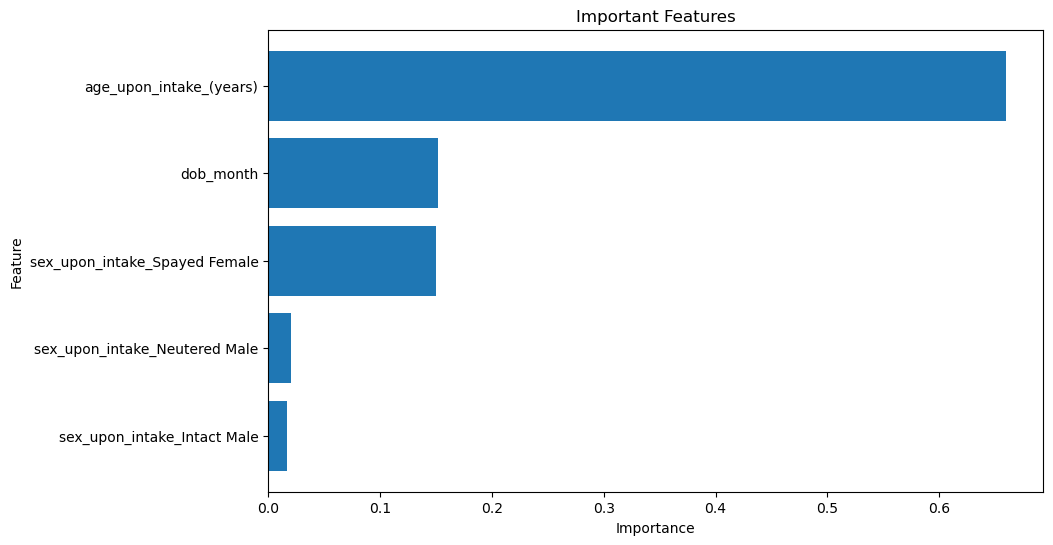

In [57]:
# Retrieve feature importances
feature_importances = gb_regressor_cleaned.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X_regression_low_vif_cleaned.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
top_important_features = importance_df.head(10)
print("Important Features for Predicting Time in Shelter:")
print(top_important_features)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_important_features['Feature'], top_important_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Important Features')
plt.gca().invert_yaxis()  # Reverse the y-axis for better readability
plt.show()

The best function of a tree model is that the results can be interpreted easily. The feature importance is a measure of how much a feature contributes to the model's prediction. The feature importance is calculated based on the decrease in impurity (e.g., Gini impurity) that the feature provides when used in a split. The higher the importance, the more the feature contributes to the model's prediction. We plotted the top 5 important features for predicting the time in shelter for cats. The feature importance can help us understand which features are most relevant for predicting the time in shelter and can provide insights into the factors that influence the variable we concern. The results show that the most important feature is the age, which makes since. An old cat is more likely to be sick and die, while a young cat is more likely to be adopted. Sex is also a important feature. People always prefer a spayed female cat. Surprisingly, the month of the brith is a important feature, which can be because of the bias in the dataset, or some kind of seasonal effect.

At last, we did a case study, we created some cases and used our trained model to predict their likelihood of adoption and potential time in the shelter.

In [58]:
# Function to make predictions based on the regression model
def predict_time_in_shelter(age, dob_month, sex_upon_intake, breed, color, intake_condition):
    # Create a feature dictionary with default values (0) for one-hot encoded features
    feature_dict = {feature: 0 for feature in X_regression_low_vif_cleaned.columns}
    
    # Assign values to the specified features
    feature_dict['age_upon_intake_(years)'] = age
    feature_dict['dob_month'] = dob_month
    feature_dict[f'sex_upon_intake_{sex_upon_intake}'] = 1
    feature_dict[f'breed_{breed}'] = 1
    feature_dict[f'color_{color}'] = 1
    feature_dict[f'intake_condition_{intake_condition}'] = 1
    
    # Convert dictionary to a DataFrame for prediction
    feature_vector = pd.DataFrame([feature_dict])
    
    # Ensure columns match the training set
    feature_vector = feature_vector.reindex(columns=X_regression_low_vif_cleaned.columns, fill_value=0)
    
    # Predict using the trained Gradient Boosting model
    predicted_days = gb_regressor_cleaned.predict(feature_vector)
    return predicted_days[0]

def predict_adoption(age, dob_month, sex_upon_intake, breed, color, intake_condition):
    # Create a feature dictionary with default values (0) for one-hot encoded features
    feature_dict = {feature: 0 for feature in X_classification.columns}
    
    # Assign values to the specified features
    feature_dict['age_upon_intake_(years)'] = age
    feature_dict[f'sex_upon_intake_{sex_upon_intake}'] = 1
    feature_dict[f'breed_{breed}'] = 1
    feature_dict[f'color_{color}'] = 1
    feature_dict[f'intake_condition_{intake_condition}'] = 1
    
    # Convert dictionary to a DataFrame for prediction
    feature_vector = pd.DataFrame([feature_dict])
    
    # Ensure columns match the training set
    feature_vector = feature_vector.reindex(columns=X_classification.columns, fill_value=0)
    
    # Predict using the trained logistic regression model
    adoption_prob = logistic_model.predict_proba(feature_vector)[0, 1]
    return adoption_prob

# Example scenarios
scenarios = [
    {'age': 2, 'dob_month': 5, 'sex_upon_intake': 'Neutered Male', 'breed': 'Chartreux Mix', 'color': 'Blue/Tortie', 'intake_condition': 'Normal'},
    {'age': 2, 'dob_month': 3, 'sex_upon_intake': 'Spayed Female', 'breed': 'Cymric Mix', 'color': 'Lynx Point/Tortie Point', 'intake_condition': 'Normal'},
    {'age': 2, 'dob_month': 3, 'sex_upon_intake': 'Intact Female', 'breed': 'Cymric Mix', 'color': 'Lynx Point/Tortie Point', 'intake_condition': 'Normal'},
    {'age': 15, 'dob_month': 3, 'sex_upon_intake': 'Spayed Female', 'breed': 'Cymric Mix', 'color': 'Lynx Point/Tortie Point', 'intake_condition': 'Normal'},
    {'age': 5, 'dob_month': 10, 'sex_upon_intake': 'Neutered Male', 'breed': 'Pixiebob Shorthair Mix', 'color': 'Orange Tabby/Brown', 'intake_condition': 'Injured'},
]

# Make predictions for each scenario
for i, scenario in enumerate(scenarios):
    predicted_days = predict_time_in_shelter(**scenario)
    print(f"Scenario {i+1}: Predicted time in shelter = {predicted_days:.2f} days")

# Make predictions for each scenario
for i, scenario in enumerate(scenarios):
    adoption_prob = predict_adoption(**scenario)
    print(f"Scenario {i+1}: Probability of adoption = {adoption_prob:.2f}")

Scenario 1: Predicted time in shelter = 18.74 days
Scenario 2: Predicted time in shelter = 20.42 days
Scenario 3: Predicted time in shelter = 18.00 days
Scenario 4: Predicted time in shelter = 28.57 days
Scenario 5: Predicted time in shelter = 22.58 days
Scenario 1: Probability of adoption = 0.73
Scenario 2: Probability of adoption = 0.82
Scenario 3: Probability of adoption = 0.79
Scenario 4: Probability of adoption = 0.58
Scenario 5: Probability of adoption = 0.62


An old cat is the least likely to be adopted, and will stay in the shelter for the longest time, as well as a sick cat. Among young normal cats, a spayed female is more popular.

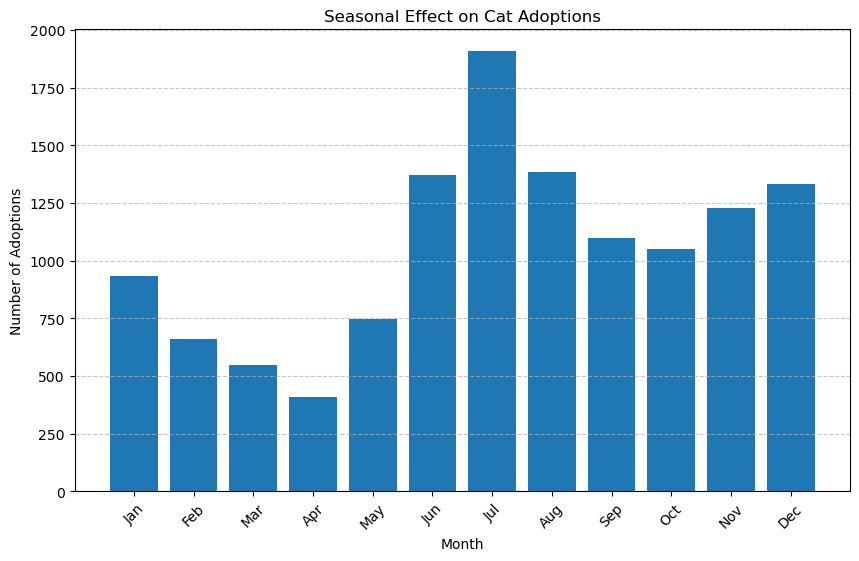

outcome_month
1      934
2      661
3      550
4      409
5      748
6     1372
7     1907
8     1386
9     1099
10    1049
11    1227
12    1332
Name: count, dtype: int64


In [59]:
adopted_cats = cats.filter(pl.col('adopted') == 1).to_pandas()

# Ensure outcome_datetime is in datetime format
adopted_cats['outcome_datetime'] = pd.to_datetime(adopted_cats['outcome_datetime'])

# Extract the month of adoption
adopted_cats['outcome_month'] = adopted_cats['outcome_datetime'].dt.month

# Aggregate adoptions by month
monthly_adoption_counts = adopted_cats['outcome_month'].value_counts().sort_index()

# Plot seasonal trends in cat adoptions
plt.figure(figsize=(10, 6))
plt.bar(monthly_adoption_counts.index,
        monthly_adoption_counts.values,
        tick_label=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Seasonal Effect on Cat Adoptions')
plt.xlabel('Month')
plt.ylabel('Number of Adoptions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print monthly adoption counts for further analysis
print(monthly_adoption_counts)

Another interesting fact, people are more likely to adopt cats in the summer months (June, July, August) and around the holiday season (November, December). This could be due to the warmer weather and more free time during the summer, as well as the festive spirit and gift-giving nature of the holiday season. Animal shelters could leverage this information to plan adoption drives and promotions during these peak months to increase adoption rates and find loving homes for more cats.